In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Configuring the optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
#Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.mse,metrics=[metrics.binary_accuracy])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
# Setting aside a validation set
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
#Training your model
model.compile(optimizer='rmsprop',loss='mse',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.1524 - acc: 0.7791 - val_loss: 0.1136 - val_acc: 0.8448
Epoch 2/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0699 - acc: 0.9099 - val_loss: 0.0854 - val_acc: 0.8843
Epoch 3/20
30/30 [==============================] - 2s 59ms/step - loss: 0.0515 - acc: 0.9338 - val_loss: 0.0848 - val_acc: 0.8867
Epoch 4/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0387 - acc: 0.9507 - val_loss: 0.0910 - val_acc: 0.8828
Epoch 5/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0338 - acc: 0.9585 - val_loss: 0.0964 - val_acc: 0.8786
Epoch 6/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0270 - acc: 0.9673 - val_loss: 0.1017 - val_acc: 0.8738
Epoch 7/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0232 - acc: 0.9719 - val_loss: 0.1025 - val_acc: 0.8791
Epoch 8/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0194 - a

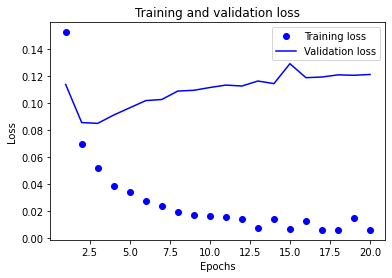

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

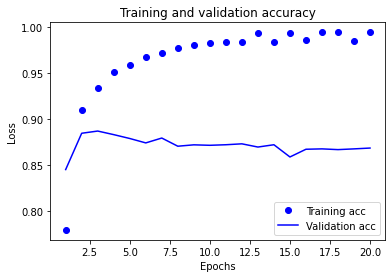

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 2s 25ms/step - loss: 0.4763 - accuracy: 0.8200
Epoch 2/3
49/49 [==============================] - 1s 26ms/step - loss: 0.2846 - accuracy: 0.9074
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2784 - accuracy: 0.8909


In [ ]:
results

[0.2783517837524414, 0.8908799886703491]

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.30221263],
       [0.9988634 ],
       [0.8796822 ],
       ...,
       [0.10346469],
       [0.14342326],
       [0.48297468]], dtype=float32)

In [ ]:
import tensorflow as tf
class myCallBack (tf.keras.callbacks.Callback):
  def on_epoch_end (self,epoch,lgs={}):
    if (logs.get('accuracy')>0.8):
      print("\nReached 80% accuracy so calling out training!")
      self.model.stop_training = True
    


In [ ]:
reviews= tf.keras.datasets.imdb

In [ ]:
reviews

<module 'keras.api._v2.keras.datasets.imdb' from '/usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/datasets/imdb/__init__.py'>

In [ ]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.mse,metrics=[metrics.binary_accuracy])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
# Setting aside a validation set
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
#Training your model
model.compile(optimizer='rmsprop',loss='mse',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=4,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 2s 45ms/step - loss: 0.2251 - acc: 0.6252 - val_loss: 0.2100 - val_acc: 0.7183
Epoch 2/4
30/30 [==============================] - 1s 31ms/step - loss: 0.1946 - acc: 0.7606 - val_loss: 0.1897 - val_acc: 0.8163
Epoch 3/4
30/30 [==============================] - 1s 30ms/step - loss: 0.1725 - acc: 0.8357 - val_loss: 0.1742 - val_acc: 0.8251
Epoch 4/4
30/30 [==============================] - 1s 30ms/step - loss: 0.1569 - acc: 0.8752 - val_loss: 0.1647 - val_acc: 0.8354


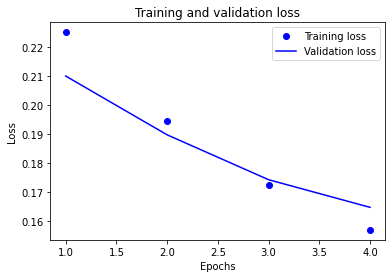

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

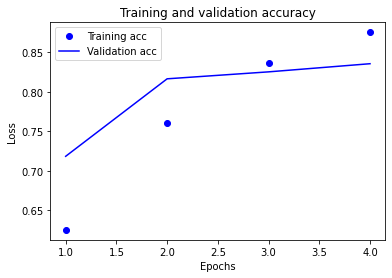

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.mse,metrics=[metrics.binary_accuracy])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
# Setting aside a validation set
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
#Training your model
model.compile(optimizer='rmsprop',loss='mse',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=4,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 3s 68ms/step - loss: 0.2066 - acc: 0.7747 - val_loss: 0.1531 - val_acc: 0.8659
Epoch 2/4
30/30 [==============================] - 1s 36ms/step - loss: 0.1261 - acc: 0.8967 - val_loss: 0.1264 - val_acc: 0.8862
Epoch 3/4
30/30 [==============================] - 1s 35ms/step - loss: 0.1045 - acc: 0.9179 - val_loss: 0.1311 - val_acc: 0.8622
Epoch 4/4
30/30 [==============================] - 1s 35ms/step - loss: 0.0944 - acc: 0.9299 - val_loss: 0.1230 - val_acc: 0.8753


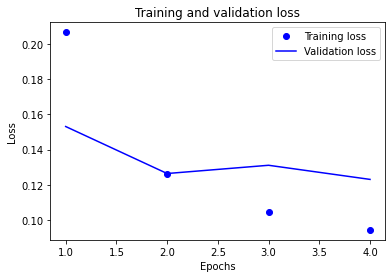

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()